<a href="https://colab.research.google.com/github/Imran-co/Imran/blob/main/project_sequential_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np

# Load the MNIST dataset
(x, y), _ = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x = x / 255.0

# Flatten images (28x28 → 784)
x = x.reshape(-1, 784)

# One-hot encode labels
y = keras.utils.to_categorical(y, 10)

# Split dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8571 - loss: 0.4813 - val_accuracy: 0.9568 - val_loss: 0.1402
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9630 - loss: 0.1191 - val_accuracy: 0.9690 - val_loss: 0.1030
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9764 - loss: 0.0786 - val_accuracy: 0.9732 - val_loss: 0.0868
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0555 - val_accuracy: 0.9733 - val_loss: 0.0872
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9862 - loss: 0.0414 - val_accuracy: 0.9755 - val_loss: 0.0815
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0785
Test Accuracy: 0.9755


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


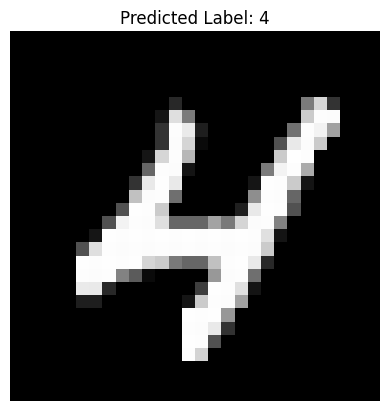

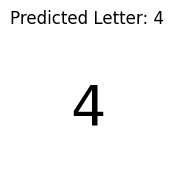

In [3]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

def predict_image(index):
    image = x_test[index].reshape(1, 784)  # Reshape to original format
    prediction = np.argmax(model.predict(image))  # Get predicted label
    predicted_letter = str(prediction)


    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {prediction}")
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(2, 2))
    plt.text(0.5, 0.5, predicted_letter, fontsize=40, ha='center', va='center')
    plt.title(f"Predicted Letter: {predicted_letter}")
    plt.axis('off')
    plt.show()


# Test with a random image
predict_image(9000)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9902 - loss: 0.0320 - val_accuracy: 0.9725 - val_loss: 0.1034
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.9739 - val_loss: 0.1015
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accuracy: 0.9712 - val_loss: 0.1092
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9928 - loss: 0.0212 - val_accuracy: 0.9762 - val_loss: 0.0931
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9762 - val_loss: 0.1016


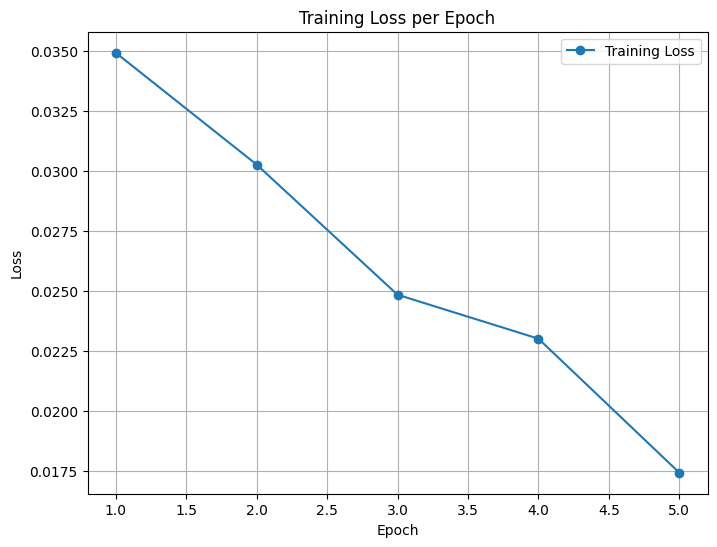

In [4]:
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

# ... (your existing model training code) ...

# Train the model and store history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Access the training loss values from the history object
epochLosses = history.history['loss']

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(epochLosses) + 1), epochLosses, marker='o', label="Training Loss")
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import f1_score, roc_auc_score

# Get predictions on the test set
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate F1 score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculate AUC score (multiclass case)
auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr', average='weighted')
print(f"AUC Score: {auc:.4f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
F1 Score: 0.9762
AUC Score: 0.9994


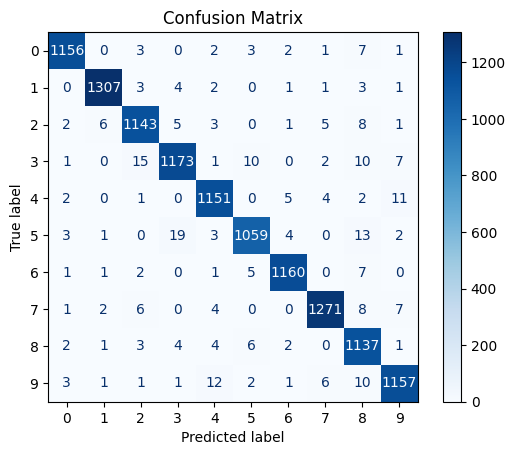

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

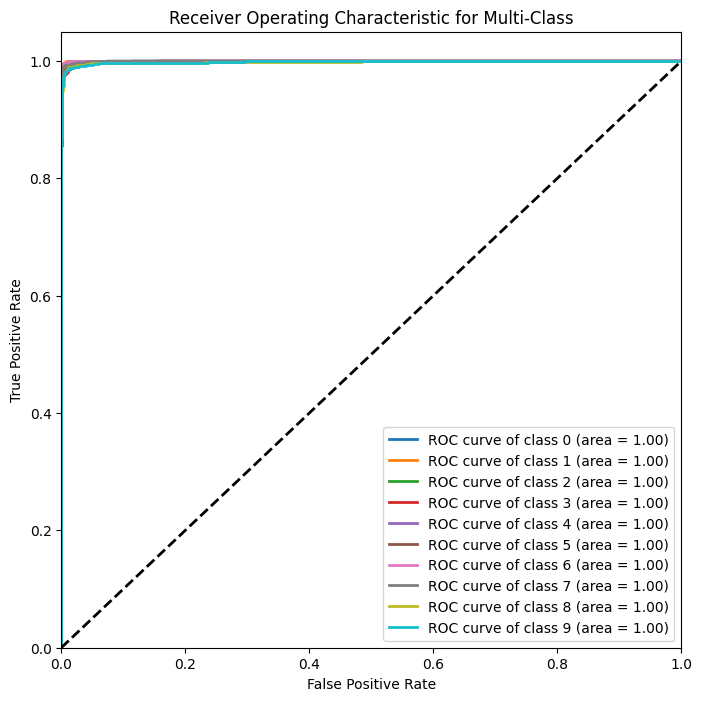

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ... (your existing model training and AUC score calculation code) ...

# Binarize the true labels for multi-class ROC
y_true_binarized = label_binarize(y_true_classes, classes=range(10))

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10): # For each class (0-9)
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from tensorflow import keras  # Only needed for loading the dataset

# Load the MNIST dataset
(x, y), _ = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0,1]
x = x / 255.0

# Flatten images (28x28 → 784)
x = x.reshape(-1, 784)

# Split dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0)  # Using radial basis function (RBF) kernel

x_train_subset = x_train[:10000]
y_train_subset = y_train[:10000]

# Train the SVM classifier
svm_classifier.fit(x_train_subset, y_train_subset)

# Evaluate on test data
accuracy = svm_classifier.score(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9623


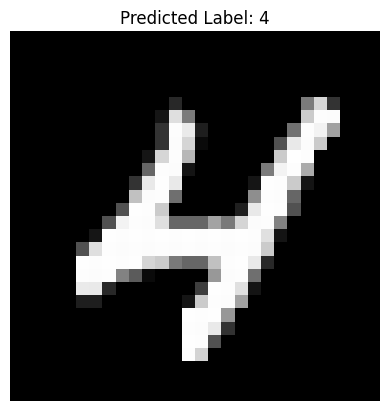

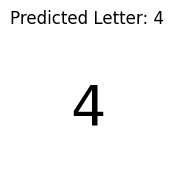

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def predict_image_svm(index):
    image = x_test[index].reshape(1, -1)  # Reshape for SVM input
    prediction = svm_classifier.predict(image)[0]  # Get predicted label
    predicted_letter = str(prediction)

    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {prediction}")
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(2, 2))
    plt.text(0.5, 0.5, predicted_letter, fontsize=40, ha='center', va='center')
    plt.title(f"Predicted Letter: {predicted_letter}")
    plt.axis('off')
    plt.show()

# Test with a random image
predict_image_svm(9000)

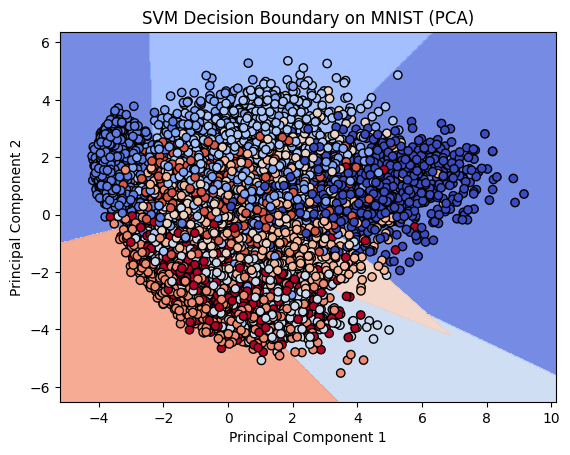

In [10]:
from sklearn.decomposition import PCA


x_subset = x[:10000]
y_subset = y[:10000]



pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x_subset)


# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # Using linear kernel for visualization

# Train the SVM classifier on the reduced data
svm_classifier.fit(x_reduced, y_subset)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = x_reduced[:, 0].min() - 1, x_reduced[:, 0].max() + 1
y_min, y_max = x_reduced[:, 1].min() - 1, x_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict labels for the meshgrid points
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c= y_subset, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary on MNIST (PCA)')
plt.show()

In [15]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize


x_test_reduced = pca.transform(x_test)

# Get predictions on the test set
y_pred_classes = svm_classifier.predict(x_test_reduced)  # SVM directly predicts class labels

# For F1 score, we use the true labels directly
y_true_classes = y_test

# Calculate F1 score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")

# For AUC, we need to binarize the true labels and use the decision function of SVM
y_test_bin = label_binarize(y_true_classes, classes=np.unique(y_true_classes))  # Binarize true labels
y_pred_decision_function = svm_classifier.decision_function(x_test_reduced)  # SVM decision function for AUC calculation

# Calculate AUC score (multiclass case using the decision function)
auc = roc_auc_score(y_test_bin, y_pred_decision_function, multi_class='ovr', average='weighted')
print(f"AUC Score: {auc:.4f}")


F1 Score: 0.4081
AUC Score: 0.8402


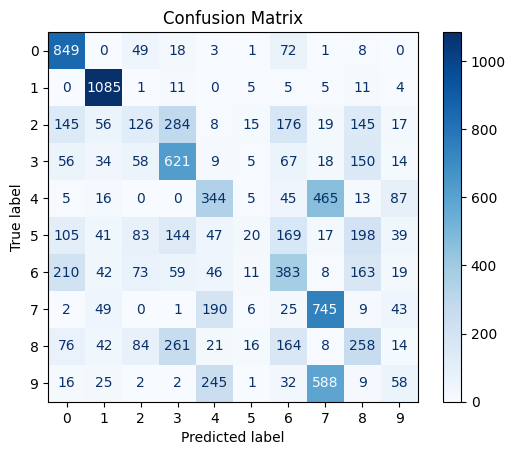

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [19]:
!pip install mlp

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [21]:
(x, y), _ = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
x = x / 255.0

# Flatten images (28x28 → 784)
x = x.reshape(-1, 784)

# One-hot encode labels
y = keras.utils.to_categorical(y, 10)

# Split dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [22]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=100, random_state=42)

model.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, random_state=42)

In [23]:
#Evaluate testing data
accuracy = model.score(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9703


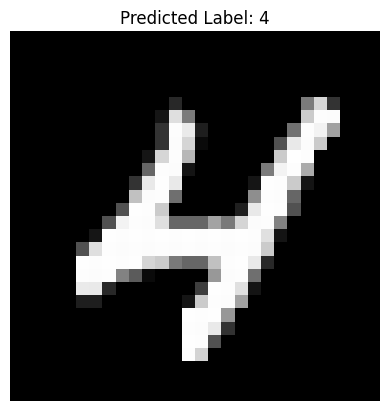

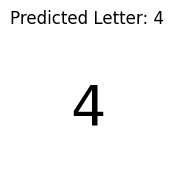

In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt  # Ensure matplotlib is imported

def predict_image(index):
    image = x_test[index].reshape(1, 784)  # Reshape to original format
    prediction = np.argmax(model.predict(image))  # Get predicted label
    predicted_letter = str(prediction)


    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {prediction}")
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(2, 2))
    plt.text(0.5, 0.5, predicted_letter, fontsize=40, ha='center', va='center')
    plt.title(f"Predicted Letter: {predicted_letter}")
    plt.axis('off')
    plt.show()


# Test with a random image
predict_image(9000)
plt.show()

In [25]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
import numpy as np

# Assuming the model is already defined and trained, for example:
# model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=100)

# Get predictions on the test set
y_pred_classes = np.argmax(model.predict(x_test), axis=1)  # For MLPClassifier, `predict` directly gives class labels
y_true_classes = np.argmax(y_test, axis=1)  # The true class labels

# Calculate F1 score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")

# Calculate AUC score (multiclass case)
# For AUC, we need predicted probabilities, not classes.
y_pred_probs = model.predict_proba(x_test)  # MLPClassifier has a `predict_proba` method
auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr', average='weighted')
print(f"AUC Score: {auc:.4f}")


F1 Score: 0.9746
AUC Score: 0.9993


In [ ]:
print(x_test.shape)


(12000, 784)


In [ ]:
print(len(x_test))  # Ensure it's greater than 9000


12000


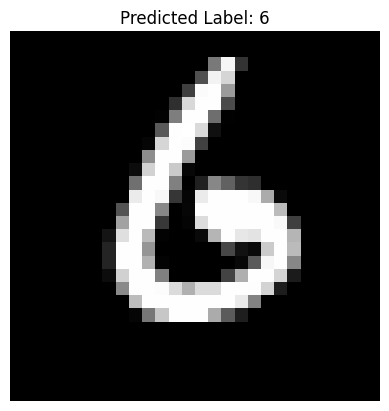

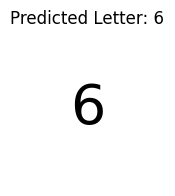

In [ ]:
predict_image(11120)  # Use a smaller index
